In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
# columns names
header_list = ["age", "class of worker", "detailed industry recode",
               "detailed occupation recode", "education", "wage per hour",
              "enroll in edu inst last wk", "marital stat","major industry code",
              "major occupation code", "race", "hispanic origin",
              "sex", "member of a labor union", "reason for unemployment",
              "full or part time employment stat", "capital gains", "capital losses",
               "dividends from stocks", "tax filer stat", "region of previous residence",
               "state of previous residence", "detailed household and family stat",
               "detailed household summary in household",
               "instance weight", "migration code-change in msa", "migration code-change in reg",
               "migration code-move within reg", "live in this house 1 year ago", "migration prev res in sunbelt",
               "num persons worked for employer", "family members under 18", "country of birth father",
               "country of birth mother", "country of birth self", "citizenship",
               "own business or self employed", "fill inc questionnaire for veteran's admin", "veterans benefits",
               "weeks worked in year", "year", "income"
              ]

data = pd.read_csv("census-income.data", names=header_list)


In [5]:
del data['instance weight']
numerical = [i for i in data.columns if data[i].dtypes != 'object']
categorical = [i for i in data.columns if i not in numerical]
discreet = [i for i in numerical if len(data[i].unique()) < 10]
continuous = [i for i in numerical if i not in discreet]



In [22]:
data['detailed household and family stat'].value_counts()

 Householder                                        53248
 Child <18 never marr not in subfamily              50326
 Spouse of householder                              41695
 Nonfamily householder                              22213
 Child 18+ never marr Not in a subfamily            12030
 Secondary individual                                6122
 Other Rel 18+ ever marr not in subfamily            1956
 Grandchild <18 never marr child of subfamily RP     1868
 Other Rel 18+ never marr not in subfamily           1728
 Grandchild <18 never marr not in subfamily          1066
 Child 18+ ever marr Not in a subfamily              1013
 Child under 18 of RP of unrel subfamily              732
 RP of unrelated subfamily                            685
 Child 18+ ever marr RP of subfamily                  671
 Other Rel <18 never marr child of subfamily RP       656
 Other Rel 18+ ever marr RP of subfamily              656
 Other Rel 18+ spouse of subfamily RP                 638
 Child 18+ nev

In [8]:
categorical

['class of worker',
 'education',
 'enroll in edu inst last wk',
 'marital stat',
 'major industry code',
 'major occupation code',
 'race',
 'hispanic origin',
 'sex',
 'member of a labor union',
 'reason for unemployment',
 'full or part time employment stat',
 'tax filer stat',
 'region of previous residence',
 'state of previous residence',
 'detailed household and family stat',
 'detailed household summary in household',
 'migration code-change in msa',
 'migration code-change in reg',
 'migration code-move within reg',
 'live in this house 1 year ago',
 'migration prev res in sunbelt',
 'family members under 18',
 'country of birth father',
 'country of birth mother',
 'country of birth self',
 'citizenship',
 "fill inc questionnaire for veteran's admin",
 'income']

In [ ]:
## TO exclude ##

'''
 'major industry code',
 'major occupation code',
 reason for unemployment
 
'''

In [ ]:
## TO INCLUDE ##

#num
'''
age
wage per hour
capital gain/loss
own business or self employed
weeks worked in year
'''
#cat
'''
class of worker
education
enroll in edu inst last wk
marital stat
race
sex
full or part time employment stat
tax filer stat
'''


In [4]:
mapping = {' - 50000.': 1, ' 50000+.': 0}
data.income = [mapping[item] for item in data.income]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[numerical], data.income, test_size=0.2) # 80% - 20%

In [7]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [8]:
from sklearn import metrics
from sklearn.metrics import classification_report
print("#### Random Forest ####")
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


#### Random Forest ####
              precision    recall  f1-score   support

           0       0.61      0.41      0.49      2452
           1       0.96      0.98      0.97     37453

    accuracy                           0.95     39905
   macro avg       0.78      0.70      0.73     39905
weighted avg       0.94      0.95      0.94     39905

Accuracy: 0.9474000751785491


In [9]:
feature_imp = pd.Series(clf.feature_importances_,index = numerical).sort_values(ascending=False)
feature_imp

age                                0.217005
detailed occupation recode         0.159156
detailed industry recode           0.136471
dividends from stocks              0.132927
capital gains                      0.111543
weeks worked in year               0.065815
num persons worked for employer    0.063193
capital losses                     0.039366
year                               0.025804
wage per hour                      0.022456
own business or self employed      0.021920
veterans benefits                  0.004344
dtype: float64

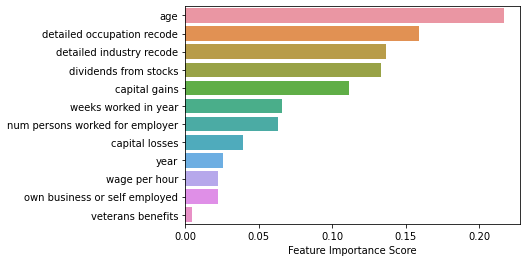

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 1012,  1440],
       [  659, 36794]], dtype=int64)

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='detailed industry recode', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='detailed industry recode'>,
        <AxesSubplot:xlabel='detailed industry recode', ylabel='detailed industry recode'>]],
      dtype=object)

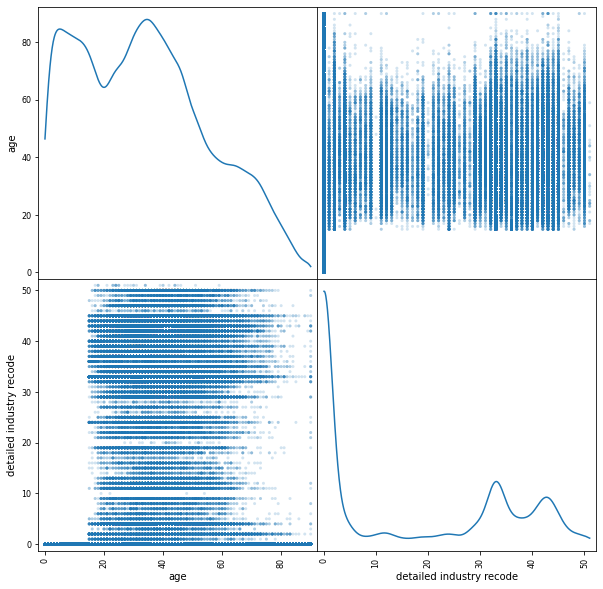

In [14]:
from pandas.plotting import scatter_matrix
#df = pd.DataFrame(np.random.randn(1000, 4), columns = ['a', 'b', 'c', 'd'])
scatter_matrix(data[continuous[0:2]], alpha = 0.2, figsize = (10, 10), diagonal = 'kde')

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train1, X_test1, y_train1, y_test1 = train_test_split(data[cat_features], data.income, test_size=0.2) # 80% - 20%

# #Create a Gaussian Classifier
# clf1=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf1.fit(X_train1,y_train1)

# y_pred1=clf1.predict(X_test1)
